# CS 6476 Project 1: Image Filtering and Hybrid Images

All projects in this course will be done with these iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).

If there are any notes you wish to leave for the TAs as they test your code, you may leave them here.

## Setup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


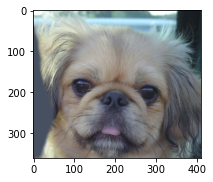

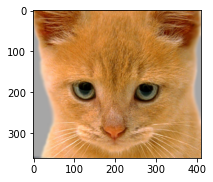

In [24]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import vis_hybrid_image, load_image, save_image
from student_code import my_imfilter, create_hybrid_image
%load_ext autoreload
%autoreload 2

image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/cat.bmp')

# display the dog and cat images
plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((image2*255).astype(np.uint8));

## Create filter

0.0005359649658203125


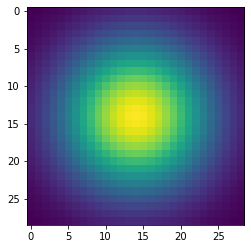

In [25]:
import time
t=time.time()
cutoff_frequency = 7
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

print(time.time()-t)
# let's take a look at the filter!
plt.figure(figsize=(4,4)); plt.imshow(filter);

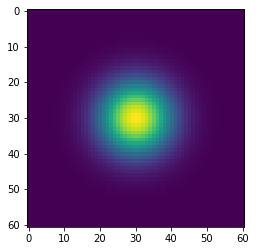

In [7]:
plt.figure(figsize=(4,4)); plt.imshow(filter);

## Apply filter to image
Both functions you need to implement in this project can be found in _student_\__code.py_. Start by implementing _my_\__imfilter_, which takes both a filter and an image, and returns the filtered image. This code block will use your _my_\__imfilter_ function to create and display a blurry version of the dog image.

consumed time is using np.pad is  0.001115560531616211
Convolution time for Revise version of algorithem is 2.828106164932251 seconds


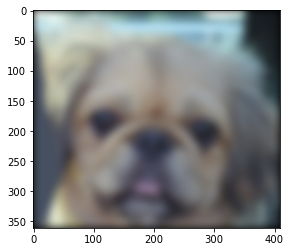

In [15]:
blurry_dog = my_imfilter(image1, filter)
plt.figure(); plt.imshow((blurry_dog*255).astype(np.uint8));

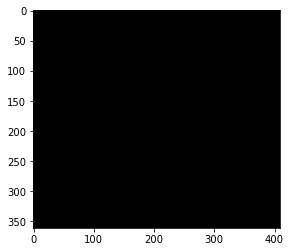

In [9]:
plt.figure(); plt.imshow((blurry_dog).astype(np.uint8));

In [7]:
import numpy as np
from matplotlib import cm

def getGaussianKernel(filter_shape=(3,3),sigma=2,plot_all=False):

    m,n = [(point-1.)/2. for point in filter_shape]
    ygrid,xgrid = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(xgrid*xgrid + ygrid*ygrid) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumofh = h.sum()
    if sumofh != 0:
        h /= sumofh
    if plot_all==True:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid,ygrid,h, cmap=cm.jet)
        plt.show()
        #fig.savefig('../results/lowpass'+str(sigma)+'.jpg')
        #blurry_dog = my_imfilter(image1, h)
        #done = save_image('../results/low_pass_image_dog'+str(sigma)+'.jpg', blurry_dog)
        #low_cat = my_imfilter(image2, h)
        #high_cat  = image2-low_cat
        #done = save_image('../results/high_pass_image_cat'+str(sigma)+'.jpg', np.clip(high_cat+0.5, 0.0, 1.0))
        #low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, h)
        #save_image('../results/catdog_hybrid_image'+str(sigma)+'.jpg', hybrid_image)
    
    return h

In [83]:
import numpy as np
from matplotlib import cm

def getGaussianKernel(filter_shape=(3,3),sigma=2,plot_all=False):

    m,n = [(point-1.)/2. for point in filter_shape]
    ygrid,xgrid = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(xgrid*xgrid + ygrid*ygrid) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumofh = h.sum()
    if sumofh != 0:
        h /= sumofh
    if plot_all==True:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid,ygrid,h, cmap=cm.jet)
        plt.show()
        fig.savefig('../results/lowpass'+str(sigma)+'.jpg')
  
    return h

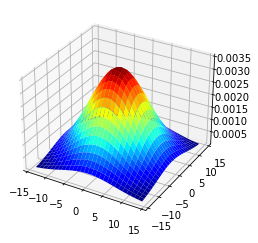

In [86]:

cutoff_frequency = 7

filter= getGaussianKernel(filter_shape=(cutoff_frequency*4+1,cutoff_frequency*4+1),
                          sigma=cutoff_frequency,plot_all=True)


consumed time is using np.pad is  0.0009126663208007812
Convolution time for Revise version of algorithem is 2.560150146484375 seconds


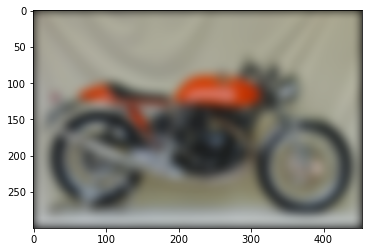

In [87]:
blurry_dog = my_imfilter(image1, filter)
plt.figure(); plt.imshow((blurry_dog*255).astype(np.uint8));

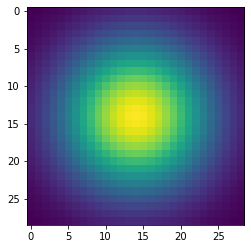

In [88]:
plt.figure(figsize=(4,4)); plt.imshow(filter);

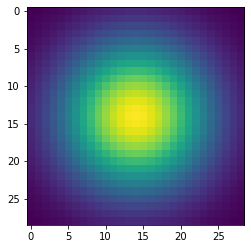

In [89]:
plt.figure(figsize=(4,4)); plt.imshow(filter);

In [79]:
image11  = 'motorcycle'
image22  = 'bicycle'

## Create hybrid image
Next, implement _create_\__hybrid_\__image_, which takes two images and makes a hybrid image using the low frequency content from one image and the high frequency content from another.

In [80]:
image1 = load_image('../data/'+image11+'.bmp')
image2 = load_image('../data/'+image22+'.bmp')
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, filter)
vis = vis_hybrid_image(hybrid_image)

consumed time is using np.pad is  0.0013680458068847656
Convolution time for Revise version of algorithem is 2.6965267658233643 seconds
consumed time is using np.pad is  0.001079559326171875
Convolution time for Revise version of algorithem is 2.6838293075561523 seconds


## Show results

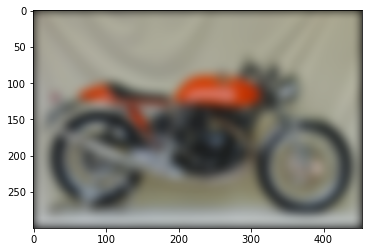

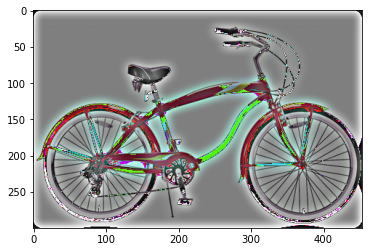

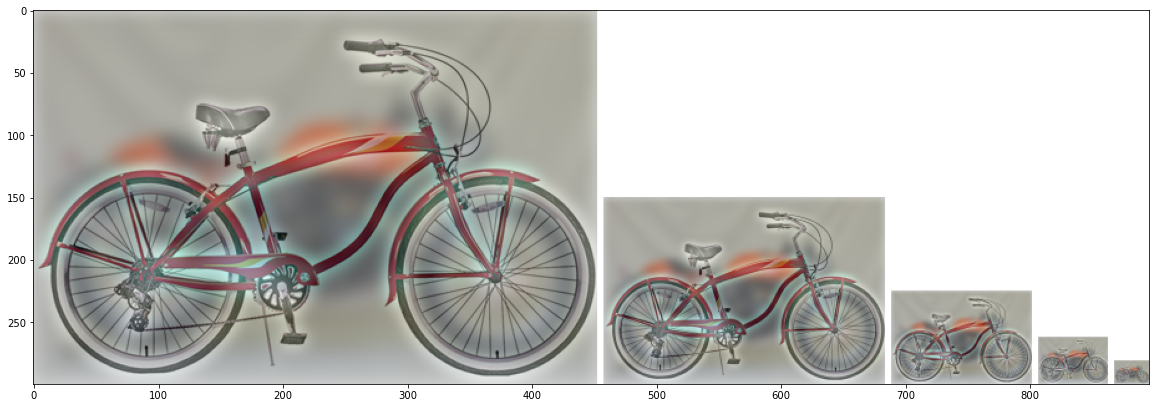

In [81]:
plt.figure(); plt.imshow((low_frequencies*255).astype(np.uint8));
plt.figure(); plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis);

## Save results

In [82]:
save_image('../results/'+image11+'_'+image22+'_low_frequencies.jpg', low_frequencies)
save_image('../results/'+image11+'_'+image22+'_high_frequencies.jpg', np.clip(high_frequencies+0.5, 0.0, 1.0))
save_image('../results/'+image11+'_'+image22+'_hybrid_image.jpg', hybrid_image)
save_image('../results/'+image11+'_'+image22+'_hybrid_image_scales.jpg', vis)

True